In [1]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



# Example 6.1: Effects of Pollution on Housing Prices, standardized.

In [2]:
data("hprice2")
?hprice2

$$price = \beta_0 + \beta_1nox + \beta_2crime + \beta_3rooms + \beta_4dist + \beta_5stratio + \mu$$

Estimate the usual lm model.


Estimate the same model, but standardized coefficients by wrapping each variable with R's scale function:

$$\widehat{zprice} = \beta_1znox + \beta_2zcrime + \beta_3zrooms + \beta_4zdist + \beta_5zstratio$$


Compare results, and observe

In [3]:
housing_level <- lm(price ~ nox + crime + rooms + dist + stratio, data = hprice2)

In [4]:
housing_standardized <- lm(scale(price) ~ 0 + scale(nox) + scale(crime) + scale(rooms) + scale(dist) + scale(stratio), data = hprice2)

In [5]:
summary(housing_level)


Call:
lm(formula = price ~ nox + crime + rooms + dist + stratio, data = hprice2)

Residuals:
   Min     1Q Median     3Q    Max 
-13914  -3201   -662   2110  38064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20871.13    5054.60   4.129 4.27e-05 ***
nox         -2706.43     354.09  -7.643 1.09e-13 ***
crime        -153.60      32.93  -4.665 3.97e-06 ***
rooms        6735.50     393.60  17.112  < 2e-16 ***
dist        -1026.81     188.11  -5.459 7.57e-08 ***
stratio     -1149.20     127.43  -9.018  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5586 on 500 degrees of freedom
Multiple R-squared:  0.6357,	Adjusted R-squared:  0.632 
F-statistic: 174.5 on 5 and 500 DF,  p-value: < 2.2e-16


In [6]:
summary(housing_standardized)


Call:
lm(formula = scale(price) ~ 0 + scale(nox) + scale(crime) + scale(rooms) + 
    scale(dist) + scale(stratio), data = hprice2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5110 -0.3476 -0.0719  0.2291  4.1334 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
scale(nox)     -0.34045    0.04450  -7.651 1.03e-13 ***
scale(crime)   -0.14328    0.03069  -4.669 3.89e-06 ***
scale(rooms)    0.51389    0.03000  17.129  < 2e-16 ***
scale(dist)    -0.23484    0.04298  -5.464 7.35e-08 ***
scale(stratio) -0.27028    0.02994  -9.027  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.606 on 501 degrees of freedom
Multiple R-squared:  0.6357,	Adjusted R-squared:  0.632 
F-statistic: 174.8 on 5 and 501 DF,  p-value: < 2.2e-16


In [8]:


stargazer(type = "text",housing_level, housing_standardized,  single.row = TRUE, header = FALSE, digits=5)


                                      Dependent variable:                   
                    --------------------------------------------------------
                                price                    scale(price)       
                                 (1)                         (2)            
----------------------------------------------------------------------------
nox                  -2,706.43300*** (354.08690)                            
crime                 -153.60100*** (32.92883)                              
rooms                6,735.49800*** (393.60370)                             
dist                 -1,026.80600*** (188.10790)                            
stratio              -1,149.20400*** (127.42870)                            
scale(nox)                                          -0.34045*** (0.04450)   
scale(crime)                                        -0.14328*** (0.03069)   
scale(rooms)                                         0.51389*** (0.03000)  

# Example 6.2: Effects of Pollution on Housing Prices, Quadratic Interactive Term
Modify the housing model from example 4.5, adding a quadratic term in rooms:

$$log(price) = \beta_0 + \beta_1log(nox) + \beta_2log(dist) + \beta_3rooms + \beta_4rooms^2 + \beta_5stratio + \mu$$

In [9]:
housing_model_4.5 <- lm(lprice ~ lnox + log(dist) + rooms + stratio, data = hprice2)

housing_model_6.2 <- lm(lprice ~ lnox + log(dist) + rooms + I(rooms^2) + stratio, 
                        data = hprice2)

In [10]:
summary(housing_model_4.5)



Call:
lm(formula = lprice ~ lnox + log(dist) + rooms + stratio, data = hprice2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05890 -0.12427  0.02128  0.12882  1.32531 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.083862   0.318111  34.843  < 2e-16 ***
lnox        -0.953539   0.116742  -8.168 2.57e-15 ***
log(dist)   -0.134339   0.043103  -3.117  0.00193 ** 
rooms        0.254527   0.018530  13.736  < 2e-16 ***
stratio     -0.052451   0.005897  -8.894  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.265 on 501 degrees of freedom
Multiple R-squared:  0.584,	Adjusted R-squared:  0.5807 
F-statistic: 175.9 on 4 and 501 DF,  p-value: < 2.2e-16


In [11]:
summary(housing_model_6.2)


Call:
lm(formula = lprice ~ lnox + log(dist) + rooms + I(rooms^2) + 
    stratio, data = hprice2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04285 -0.12774  0.02038  0.12650  1.25272 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.385478   0.566473  23.630  < 2e-16 ***
lnox        -0.901682   0.114687  -7.862 2.34e-14 ***
log(dist)   -0.086781   0.043281  -2.005  0.04549 *  
rooms       -0.545113   0.165454  -3.295  0.00106 ** 
I(rooms^2)   0.062261   0.012805   4.862 1.56e-06 ***
stratio     -0.047590   0.005854  -8.129 3.42e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2592 on 500 degrees of freedom
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.5988 
F-statistic: 151.8 on 5 and 500 DF,  p-value: < 2.2e-16


Estimate the minimum turning point at which the rooms interactive term changes from negative to positive.

$$x = \frac{\hat{\beta_1}}{2\hat{\beta_2}}$$



In [12]:
beta_1 <- summary(housing_model_6.2)$coefficients["rooms",1] 
beta_2 <- summary(housing_model_6.2)$coefficients["I(rooms^2)",1]
turning_point <- abs(beta_1 / (2*beta_2))

print(turning_point)

[1] 4.37763


In [13]:
#Compute the percent change across a range of average rooms. Include the smallest, turning point, and largest.

Rooms <- c(min(hprice2$rooms), 4, turning_point, 5, 5.5, 6.45, 7.5, max(hprice2$rooms))
Percent.Change <- 100*(beta_1 + 2*beta_2*Rooms)

kable(data.frame(Rooms, Percent.Change))
from <- min(hprice2$rooms)
to <- max(hprice2$rooms)
rooms <- seq(from=from, to =to, by = ((to - from)/(NROW(hprice2)-1)))
quadratic <- abs(100*summary(housing_model_6.2)$coefficients["rooms",1] + 200*summary(housing_model_6.2)$coefficients["I(rooms^2)",1]*rooms)

housing_model_frame <- model.frame(housing_model_6.2)

housing_sq <- abs(beta_1*housing_model_frame[,"rooms"]) + 
              beta_2*housing_model_frame[,"I(rooms^2)"]

#plot(y=hprice2$lprice, x=housing_sq)



|   Rooms| Percent.Change|
|-------:|--------------:|
| 3.56000|     -10.181324|
| 4.00000|      -4.702338|
| 4.37763|       0.000000|
| 5.00000|       7.749903|
| 5.50000|      13.976023|
| 6.45000|      25.805651|
| 7.50000|      38.880503|
| 8.78000|      54.819367|

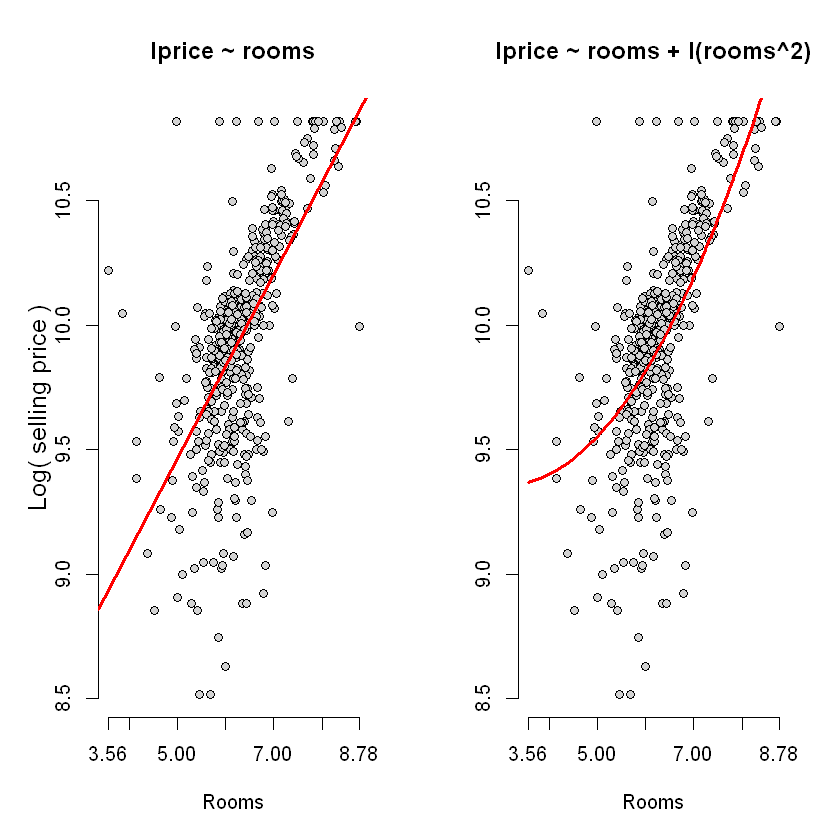

In [14]:
# Graph the log of the selling price against the number of rooms. Superimpose a simple model as well as a quadratic model and examine the difference.

rooms_interaction <- lm(lprice ~ rooms + I(rooms^2), data = hprice2)

par(mfrow=c(1,2))

plot(y = hprice2$lprice, x = hprice2$rooms, xaxt="n", pch = 21, bg = "lightgrey",
     frame = FALSE, main = "lprice ~ rooms", xlab = "Rooms", ylab = "")
mtext(side=2, line=2, "Log( selling price )", cex=1.25)
axis(side = 1, at = c(min(hprice2$rooms), 4, 5, 6, 7, 8, max(hprice2$rooms)))
abline(lm(lprice ~ rooms, data = hprice2), col="red", lwd=2.5)

plot(y = hprice2$lprice, x = hprice2$rooms, xaxt="n", pch = 21, bg = "lightgrey",
     frame = FALSE, main = "lprice ~ rooms + I(rooms^2)", xlab = "Rooms", ylab = " ")
axis(side = 1, at = c(min(hprice2$rooms), 4, 5, 6, 7, 8, max(hprice2$rooms)))
lines(sort(hprice2$rooms), sort(fitted(rooms_interaction)), col = "red", lwd=2.5)